# INFORMAÇÕES PRÉVIAS
Temos 3 tabelas de viagens de aplicativos de transporte de taxi urbano.  
Na primeira são contadas a quantidade de viagens que cada empres realizou no periodo.  
A segunda indica os bairros das viagens realizadas.  
A terceira o clima e o tempo de viagem de um bairro(Loop) até o aeroporto.  
Limparemos os dados e analizaremos quais as maiores empresas, os bairros mais movimentados e a influencia do clima. 

In [15]:

#importando pandas para operações de analise de Banco de Dados
import pandas as pd
#temos o caminho relativo, para o jupter online e o local para rodar localmente (no meu computador)    
try: 
    df=pd.read_csv('/datasets/project_sql_result_01.csv')
except:
    df=pd.read_csv('project_sql_result_01.csv')
#vamos nomear df que tem dados das viagens por empresa como 'viagem_empresa', para não confundir.
viagem_empresa= df
#vejamos as informações gerais
viagem_empresa.info()
print(viagem_empresa['trips_amount'].describe())
viagem_empresa
#nada anormal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [16]:
#investigando duplicadas:
print(viagem_empresa.duplicated().sum())
viagem_empresa=viagem_empresa.drop_duplicates()
print(viagem_empresa.duplicated().sum())

0
0


In [17]:
#façamos o mesmo para a tabela 2
try: 
    df2=pd.read_csv('/datasets/project_sql_result_04.csv')
except:
    df2=pd.read_csv('project_sql_result_04.csv')
viagem_bairro  = df2 
viagem_bairro.info()
print(viagem_bairro['average_trips'].describe())
viagem_bairro

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
count       94.000000
mean       599.953728
std       1714.591098
min          1.800000
25%         14.266667
50%         52.016667
75%        298.858333
max      10727.466667
Name: average_trips, dtype: float64


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [18]:
#investigando duplicadas:
print(viagem_bairro.duplicated().sum())
viagem_bairro=viagem_bairro.drop_duplicates()
print(viagem_bairro.duplicated().sum())


0
0


In [19]:
#vamos identificar os principais bairros em termos de destino 
#para isso vamos usar o sort_values na coluna average_trips selecionar os 10 primeiros resultados e salvar em top10
top10=viagem_bairro.sort_values(by = ['average_trips'], ascending = False).head(10)
print(top10)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


In [20]:
#vamos fazer graficos para melhor visualização
#primeiro vejamos as empresas e o numero de viagens (usei apenas as 20 maiores para melhor compreenção)

<Axes: xlabel='company_name'>

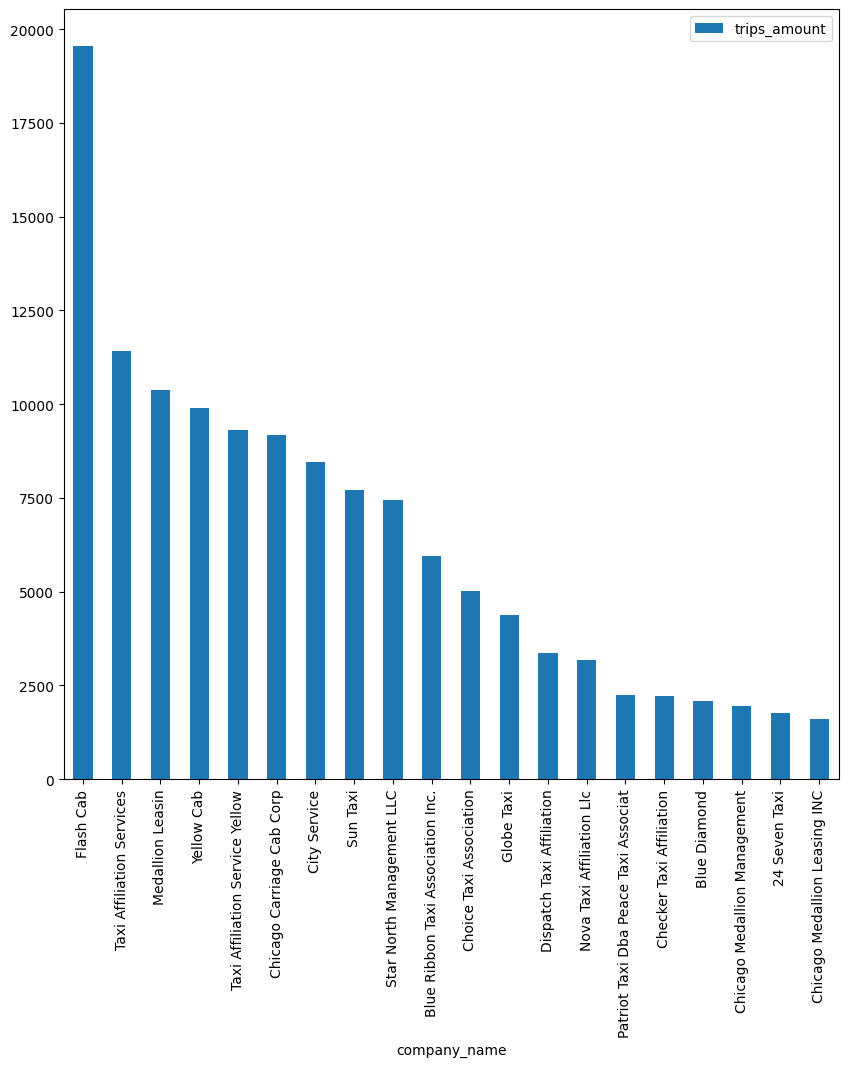

In [21]:
#uma grafico de barras será suficiente
df.sort_values(by= 'trips_amount', ascending = False).head(20).plot(kind='bar',x= 'company_name', y='trips_amount', figsize= [10,10])

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


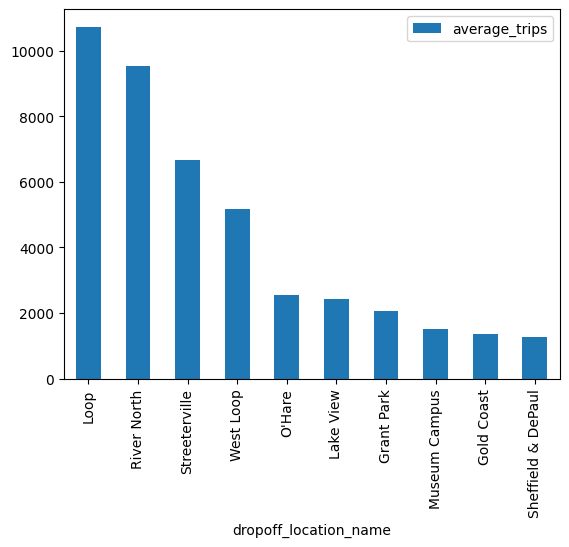

In [22]:
# agora um grafico para os 10 bairros com mais corridas:
top10.plot(kind='bar', x ='dropoff_location_name', y = 'average_trips')
top10

vejo que  quatro bairros são muito mais visado que os demais
além disso, flashcab é a empresa numero 1 com quase o dobro de viagens da segunda colocada 
alem disso as 9 maiores empresas, com exceção da flashcab são parecidas em numero de corridas

In [23]:
#agora vamos analisar uma terceira tabela que fala de clima
try: 
    df3=pd.read_csv('/datasets/datasets/project_sql_result_07.csv')
except:
    df3=pd.read_csv('project_sql_result_07.csv')
clima = df3
clima.info()
#percebi necessidade de conversão do tipo de objeto string para datetime
clima['start_ts'] = pd.to_datetime(clima['start_ts'])
clima.info()
print(clima['weather_conditions'].value_counts())
clima

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB
weather_conditions
Good    888
Bad     180
Name: count, dtype: int64


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


Passo 5. Testando hipóteses (Python)  
/datasets/project_sql_result_07.csv — o resultado da última consulta. Ele contém dados sobre viagens do Loop para o Aeroporto Internacional O'Hare.   Lembre-se, estes são os valores dos campos da tabela:  
    • start_ts  
        ◦ data e hora de coleta  
    • weather_conditions  
        ◦ condições meteorológicas no momento em que a corrida começou  
    • duration_seconds  
        ◦ duração da corrida em segundos  
Teste a hipótese:  
"A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos."   
Decida onde definir o nível de significância (alfa) por conta própria.  
Explique:  
    • como você formou as hipóteses nula e alternativa  
    • qual critério você usou para testar a hipótese e porque  

In [24]:
#investigando duplicadas:
print(clima.duplicated().sum())
clima=clima.drop_duplicates()
print(clima.duplicated().sum())
#achamos 197 linhas duplicadas e às excluimos

197
0


In [25]:
#vamos ver as medias do tempo de corrida, quando o tempo está chuvoso e quando está bom
clima.groupby('weather_conditions').mean()
#salvando as amostras de tempo bom e tempo ruim em variaveis diferentes
wcBad = clima[clima['weather_conditions']=='Bad']['duration_seconds']
wcGood = clima[clima['weather_conditions']=='Good']['duration_seconds']
print(wcBad)
print(wcGood)

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 148, dtype: float64
0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1057    2492.0
1059    1303.0
1060    2700.0
1063       0.0
1064    1318.0
Name: duration_seconds, Length: 723, dtype: float64


(array([ 2., 13., 24., 17., 36., 35., 17.,  3.,  0.,  1.]), array([ 480.,  930., 1380., 1830., 2280., 2730., 3180., 3630., 4080.,
       4530., 4980.]), <BarContainer object of 10 artists>)


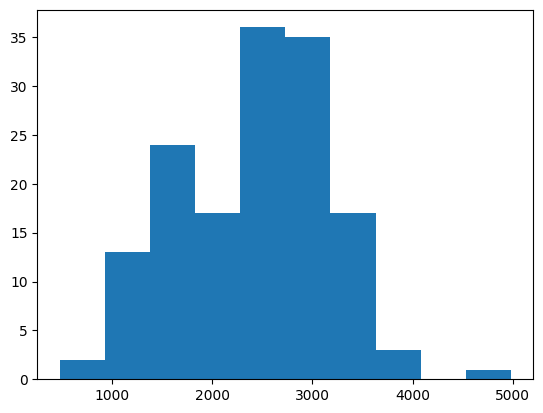

In [26]:
# vamos ver como é a distribuição dos dados de clima bom e clima ruim:
import matplotlib.pyplot as plt
print(plt.hist(wcBad, 10))

(array([  8., 210., 245., 177.,  71.,   8.,   2.,   0.,   1.,   1.]), array([   0.,  744., 1488., 2232., 2976., 3720., 4464., 5208., 5952.,
       6696., 7440.]), <BarContainer object of 10 artists>)


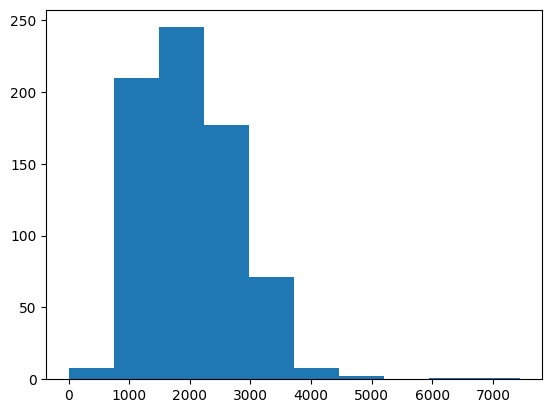

In [27]:
print(plt.hist(wcGood, 10))

In [28]:
wcGood

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1057    2492.0
1059    1303.0
1060    2700.0
1063       0.0
1064    1318.0
Name: duration_seconds, Length: 723, dtype: float64

count     709.000000
mean     2026.345557
std       678.376927
min      1018.000000
25%      1440.000000
50%      1909.000000
75%      2475.000000
max      3982.000000
Name: duration_seconds, dtype: float64
(array([ 81., 186.,  87.,  86.,  96.,  66.,  44.,  30.,  26.,   7.]), array([1018. , 1314.4, 1610.8, 1907.2, 2203.6, 2500. , 2796.4, 3092.8,
       3389.2, 3685.6, 3982. ]), <BarContainer object of 10 artists>)


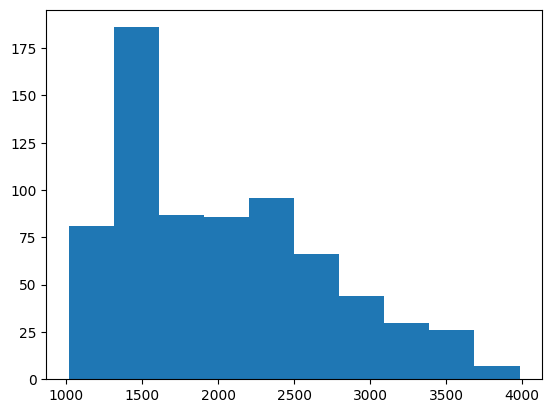

In [29]:
#determinando limite para remover valores excentricos (outlines)
Q1 = wcGood.quantile(0.25)
Q3 = wcGood.quantile(0.75)
IQR = Q3 - Q1

# Defina os limites inferior e superior para remover outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remova os outliers
wGLimpo = wcGood[(wcGood >= lower_bound) & (wcGood <= upper_bound)]

#alem disso, como ninguem é um foguete, acho impossivel chegar ao aeroporto(que fica a quase 10 milhas(em linha reta))
#em menos de 5 min
# vejamos o tempo de um veiculo voador a 100km/h:  10milhas = 16km ; 16km/ 100km/h = 0.16h; 0.16h*3600 = 576 segundos
#portanto qualquer tempo abaixo de 500s ~= 8 min será considerado irreal

wGLimpo = wGLimpo[wGLimpo>500]
print(wGLimpo.describe())
print(plt.hist(wGLimpo, 10))

(array([19., 17.,  5., 17., 26., 21., 21., 11.,  6.,  2.]), array([1182. , 1468.2, 1754.4, 2040.6, 2326.8, 2613. , 2899.2, 3185.4,
       3471.6, 3757.8, 4044. ]), <BarContainer object of 10 artists>)


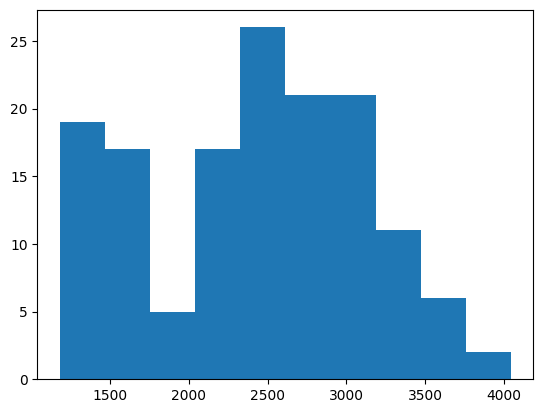

In [30]:
Q1b = wcBad.quantile(0.25)
Q3b = wcBad.quantile(0.75)
IQRb = Q3b - Q1b

# Defina os limites inferior e superior para remover outliers
lower_boundb = Q1b - 1.5 * IQRb
upper_boundb = Q3b + 1.5 * IQRb

# Remova os outliers
wBLimpo = wcBad[(wcBad >= lower_bound) & (wcBad <= upper_bound)]
wBLimpo = wBLimpo[wBLimpo>500]


print(plt.hist(wBLimpo, 10))

In [31]:
#agora vamos comparar as duas amostras a de tempo bom e de tempo ruim
#importando biblioteca
from scipy import stats as st
import numpy as np
import scipy

In [32]:
#usaremos também  teste de Levene
from scipy import stats as st
resp=scipy.stats.levene(wBLimpo,wGLimpo)
print(resp.statistic)
# defimos um nível crítico de significância estatística e chamo de alfa.
alpha = 0.05 
#se o valor do teste for menor que alfa, rejeitamos a hipótese de a variacia ser igual
#crio uma variavel booliana "vari" com valor verdadeiro ou falso 
#conforme a probabilidade de as variancias das amostras serem iguais
if resp.statistic < alpha:
    vari=False 
    print(vari)
else:
    vari=True 
    print(vari)

0.017937362876298865
False


In [33]:

#se o valor-p for menor que alfa, rejeitamos a hipótese 
#no caso, defino que: se a chance de ser coincidência for menor que 5%, então não foi coincidência, mas o clima interferindo!

hipotese_nula= 'o clima não influencia no tempo de corrida'

resultado = st.ttest_ind(wBLimpo, wGLimpo, equal_var=vari)
print('p-value: ', resultado.pvalue)

if resultado.pvalue < alpha:
  print("Rejeitamos a hipótese de que "+ hipotese_nula)
else:
  print("Nós não podemos rejeitar a hipótese de que "+ hipotese_nula)
#p-value:  4.356466833939937e-10 , portanto uma probabilidade que beira o impossível levando apenas a uma conclusão plausível:


p-value:  2.5862238821064217e-09
Rejeitamos a hipótese de que o clima não influencia no tempo de corrida


# Conclusao

como esperado, quando chove, ou ocorre uma tempestade as corridas duram mais. 
Obviamente presume-se que o transito fica mais intenso, os carros andam mais devagar, entre outras atitudes que contribuem para o maior tempo de viagem.